<a href="https://colab.research.google.com/github/S-AILAB/Predicting-Diabetes-using-Logistic-Regression/blob/main/Model_Evaluation_DT_%26_LogiR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Evaluation - Comparing Decision Tree and Logistic Regression

## Objective
In this exercise, you will compare the performance of both the Decision Tree and Logistic Regression models, evaluating which model is more suitable for predicting diabetes based on performance metrics.

#Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, recall_score, f1_score


In [ ]:
from sklearn.metrics import roc_curve, auc

#Load dataset

In [ ]:
df = pd.read_csv('/content/Diabetes.csv')

#Data Pre-Processing


##Data Inspection

In [ ]:
df.head(5)

Number of times pregnant   Plasma glucose concentration  \
0                          6                            148   
1                          1                             85   
2                          8                            183   
3                          1                             89   
4                          0                            137   

    Diastolic blood pressure   Triceps skin fold thickness  \
0                         72                            35   
1                         66                            29   
2                         64                             0   
3                         66                            23   
4                         40                            35   

    2-Hour serum insulin   Body mass index   Diabetes pedigree function  \
0                      0              33.6                        0.627   
1                      0              26.6                        0.351   
2                      0              23.3                        0.672   
3                     94              28.1                        0.167   
4                    168              43.1                        2.288   

    Age (years) Outcome  
0            50     YES  
1            31      NO  
2            32     YES  
3            21      NO  
4            33     YES

In [ ]:
df.tail()

Number of times pregnant   Plasma glucose concentration  \
763                         10                            101   
764                          2                            122   
765                          5                            121   
766                          1                            126   
767                          1                             93   

      Diastolic blood pressure   Triceps skin fold thickness  \
763                         76                            48   
764                         70                            27   
765                         72                            23   
766                         60                             0   
767                         70                            31   

      2-Hour serum insulin   Body mass index   Diabetes pedigree function  \
763                    180              32.9                        0.171   
764                      0              36.8                        0.340   
765                    112              26.2                        0.245   
766                      0              30.1                        0.349   
767                      0              30.4                        0.315   

      Age (years) Outcome  
763            63      NO  
764            27      NO  
765            30      NO  
766            47     YES  
767            23      NO

In [ ]:
df.shape

(768, 9)

In [ ]:
df.size

6912

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Number of times pregnant      768 non-null    int64  
 1    Plasma glucose concentration  768 non-null    int64  
 2    Diastolic blood pressure      768 non-null    int64  
 3    Triceps skin fold thickness   768 non-null    int64  
 4    2-Hour serum insulin          768 non-null    int64  
 5    Body mass index               768 non-null    float64
 6    Diabetes pedigree function    768 non-null    float64
 7    Age (years)                   768 non-null    int64  
 8   Outcome                        768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [ ]:
df.describe()

Number of times pregnant  Plasma glucose concentration  \
count                768.000000                    768.000000   
mean                   3.845052                    120.894531   
std                    3.369578                     31.972618   
min                    0.000000                      0.000000   
25%                    1.000000                     99.000000   
50%                    3.000000                    117.000000   
75%                    6.000000                    140.250000   
max                   17.000000                    199.000000   

       Diastolic blood pressure  Triceps skin fold thickness  \
count                768.000000                   768.000000   
mean                  69.105469                    20.536458   
std                   19.355807                    15.952218   
min                    0.000000                     0.000000   
25%                   62.000000                     0.000000   
50%                   72.000000                    23.000000   
75%                   80.000000                    32.000000   
max                  122.000000                    99.000000   

       2-Hour serum insulin  Body mass index  Diabetes pedigree function  \
count            768.000000       768.000000                  768.000000   
mean              79.799479        31.992578                    0.471876   
std              115.244002         7.884160                    0.331329   
min                0.000000         0.000000                    0.078000   
25%                0.000000        27.300000                    0.243750   
50%               30.500000        32.000000                    0.372500   
75%              127.250000        36.600000                    0.626250   
max              846.000000        67.100000                    2.420000   

       Age (years)  
count   768.000000  
mean     33.240885  
std      11.760232  
min      21.000000  
25%      24.000000  
50%      29.000000  
75%      41.000000  
max      81.000000

In [ ]:
df.columns

Index([' Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)', 'Outcome'],
      dtype='object')

In [ ]:
#column rename
df = df.rename(columns={' Number of times pregnant': 'Pregnancie',
                   ' Plasma glucose concentration': 'Glucose',
                   ' Diastolic blood pressure': 'Blood_Pressure',
                   ' Triceps skin fold thickness': 'Skin_Thickness',
                   ' 2-Hour serum insulin': 'Insulin',
                   ' Body mass index': 'BMI',
                   ' Diabetes pedigree function': 'Diabetes_Pedigree_Function',
                   ' Age (years)': 'Age'})

## Data Cleaning

In [ ]:
df.isnull().sum()

Pregnancie                    0
Glucose                       0
Blood_Pressure                0
Skin_Thickness                0
Insulin                       0
BMI                           0
Diabetes_Pedigree_Function    0
Age                           0
Outcome                       0
dtype: int64

There are no null values in the dataset.

In [ ]:
print(df.duplicated().sum())

0


There are no duplicate values in the dataset.

##Encoding Catrgorical Column

In [ ]:
df['Outcome'] = df['Outcome'].map({'YES': 1, 'NO': 0})

In [ ]:
df

Pregnancie  Glucose  Blood_Pressure  Skin_Thickness  Insulin   BMI  \
0             6      148              72              35        0  33.6   
1             1       85              66              29        0  26.6   
2             8      183              64               0        0  23.3   
3             1       89              66              23       94  28.1   
4             0      137              40              35      168  43.1   
..          ...      ...             ...             ...      ...   ...   
763          10      101              76              48      180  32.9   
764           2      122              70              27        0  36.8   
765           5      121              72              23      112  26.2   
766           1      126              60               0        0  30.1   
767           1       93              70              31        0  30.4   

     Diabetes_Pedigree_Function  Age  Outcome  
0                         0.627   50        1  
1                         0.351   31        0  
2                         0.672   32        1  
3                         0.167   21        0  
4                         2.288   33        1  
..                          ...  ...      ...  
763                       0.171   63        0  
764                       0.340   27        0  
765                       0.245   30        0  
766                       0.349   47        1  
767                       0.315   23        0  

[768 rows x 9 columns]

In [ ]:
df.dtypes

Pregnancie                      int64
Glucose                         int64
Blood_Pressure                  int64
Skin_Thickness                  int64
Insulin                         int64
BMI                           float64
Diabetes_Pedigree_Function    float64
Age                             int64
Outcome                         int64
dtype: object

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
num_cols

Index(['Pregnancie', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin',
       'BMI', 'Diabetes_Pedigree_Function', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
num_cols = num_cols.drop('Outcome')
num_cols

Index(['Pregnancie', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin',
       'BMI', 'Diabetes_Pedigree_Function', 'Age'],
      dtype='object')

In [ ]:
num_cols

Index(['Pregnancie', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin',
       'BMI', 'Diabetes_Pedigree_Function', 'Age'],
      dtype='object')

##Outlier Treatment

In [ ]:
def outlier_treatment(df):
  num_col = df.select_dtypes(include = np.number).columns
  num_col = num_col.drop('Outcome')
  for col in num_col:

    #boxplot befor outlier treatment
    print(f'Boxplot before outlier treatment: {col}')
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df[col])
    plt.show()

    #Outlier treatment
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    #boxplot after outlier treatment
    plt.figure(figsize=(8,6))
    print(f'Boxplot after outlier treatment: {col}')
    sns.boxplot(x=df[col])
    plt.show()

  return

Boxplot before outlier treatment: Pregnancie


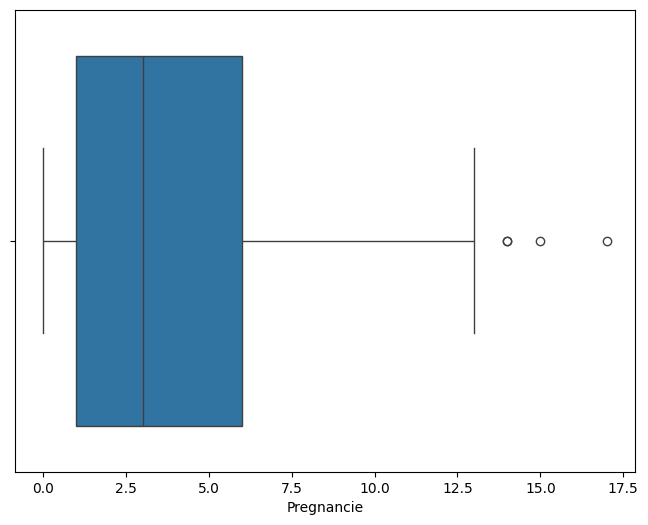

Boxplot after outlier treatment: Pregnancie


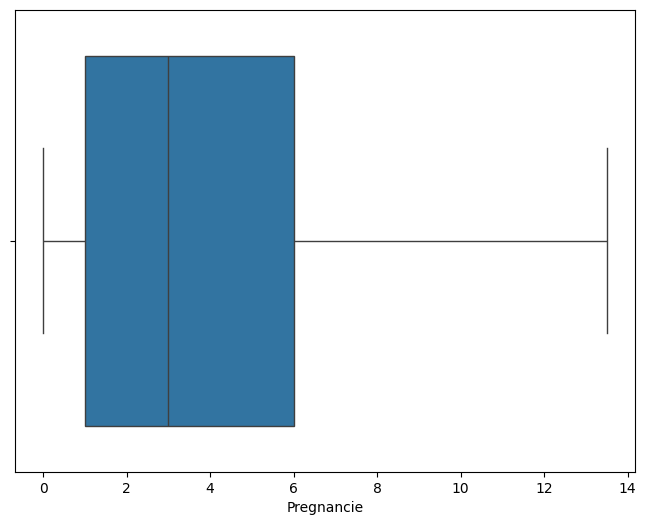

Boxplot before outlier treatment: Glucose


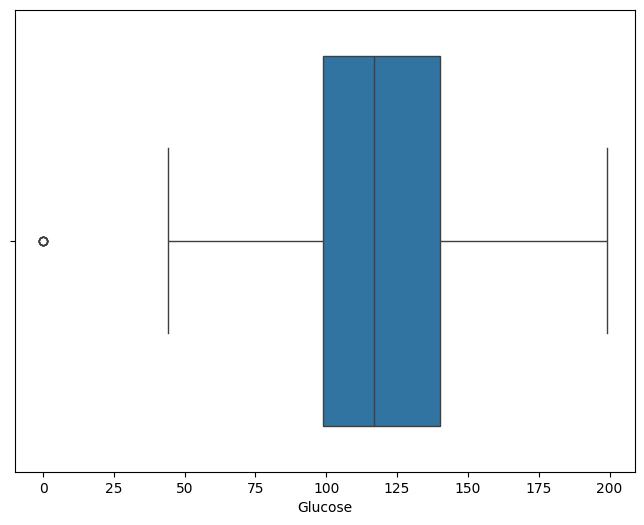

Boxplot after outlier treatment: Glucose


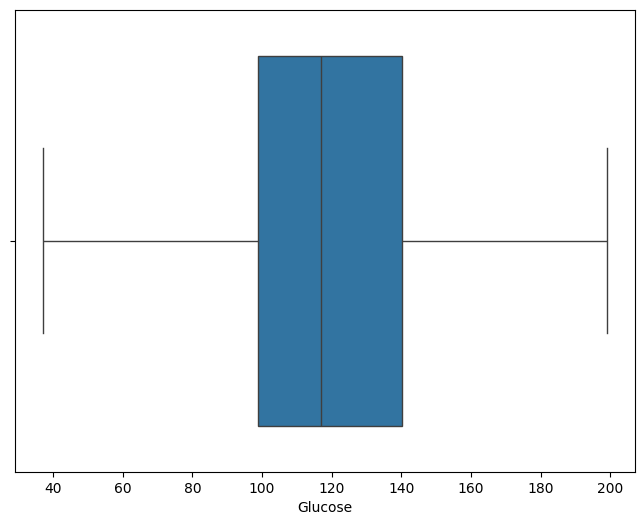

Boxplot before outlier treatment: Blood_Pressure


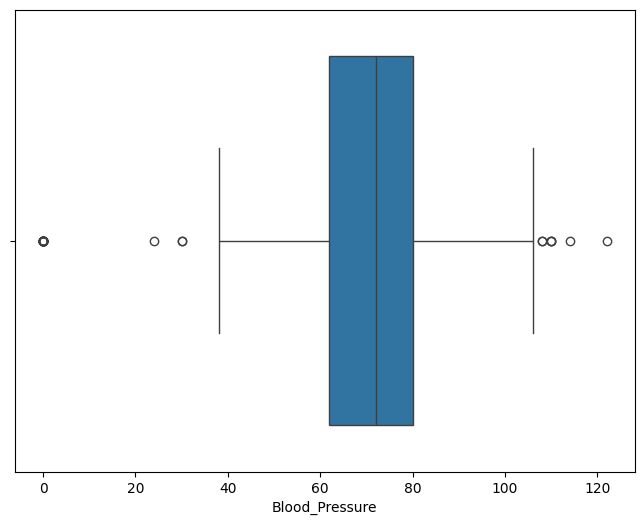

Boxplot after outlier treatment: Blood_Pressure


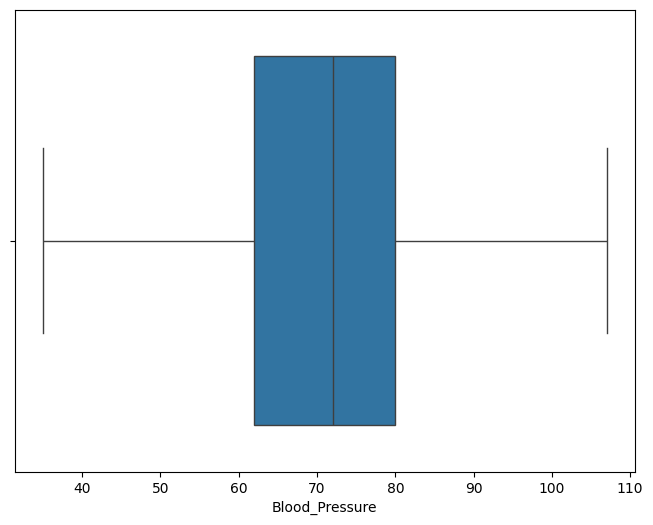

Boxplot before outlier treatment: Skin_Thickness


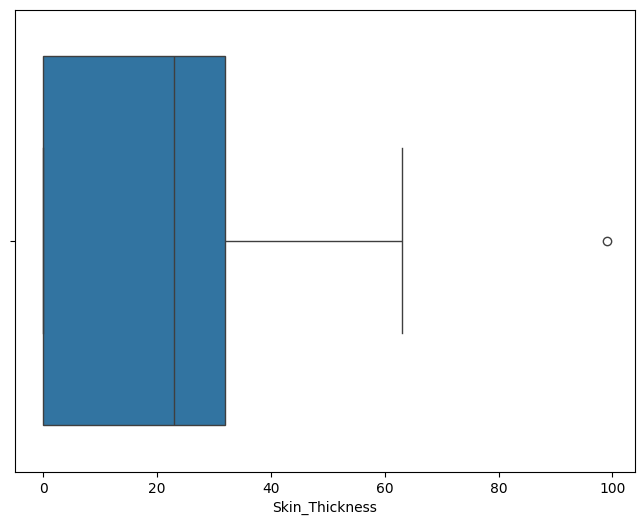

Boxplot after outlier treatment: Skin_Thickness


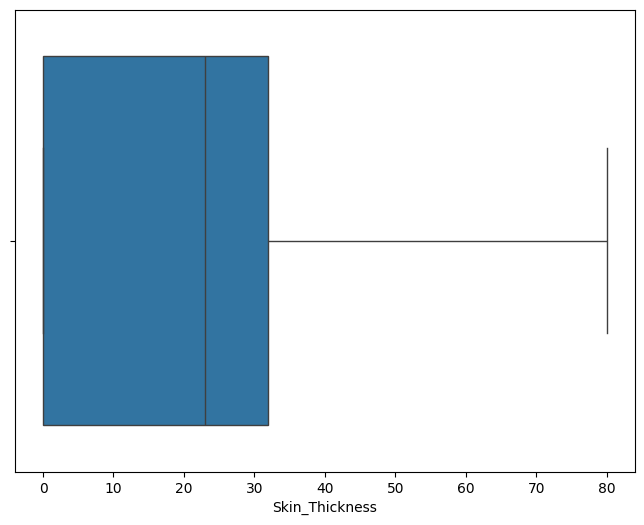

Boxplot before outlier treatment: Insulin


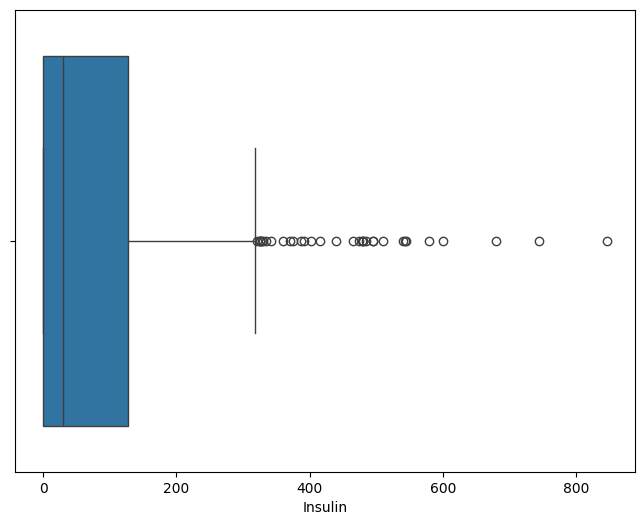

Boxplot after outlier treatment: Insulin


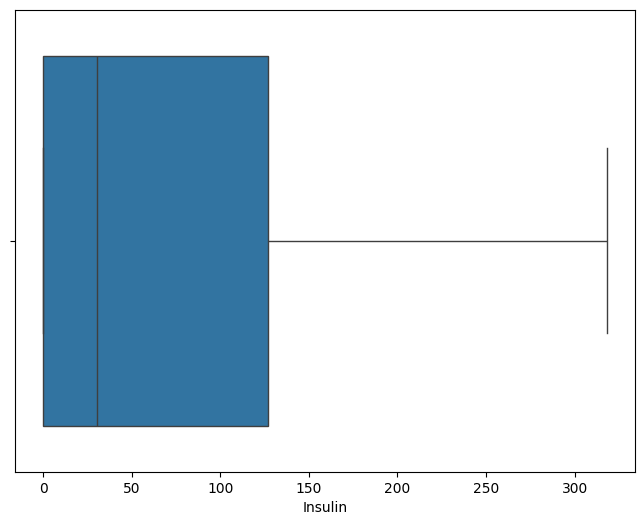

Boxplot before outlier treatment: BMI


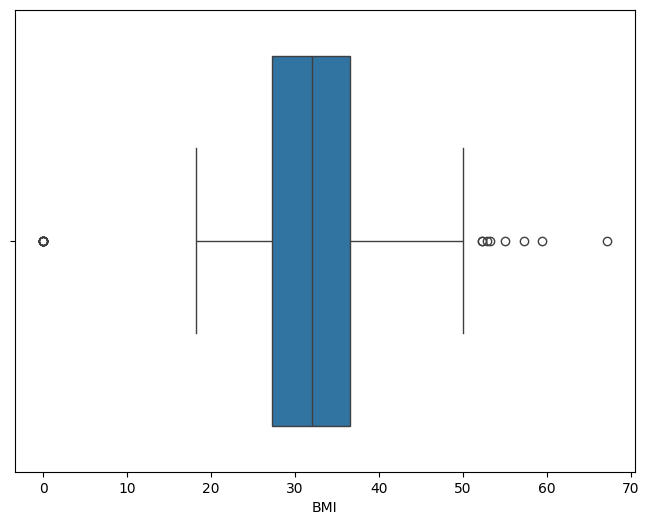

Boxplot after outlier treatment: BMI


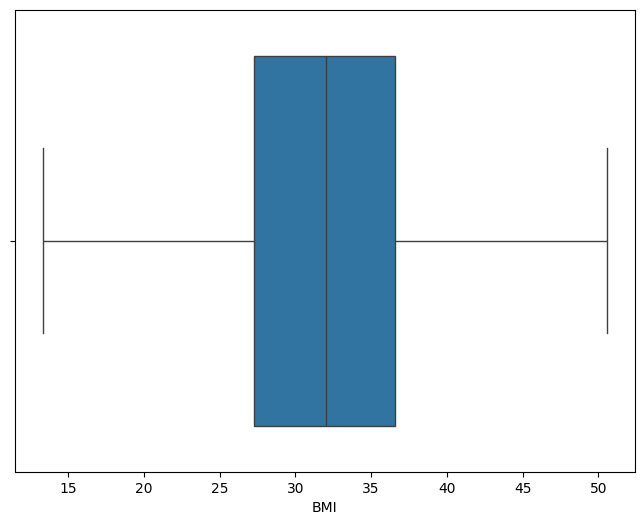

Boxplot before outlier treatment: Diabetes_Pedigree_Function


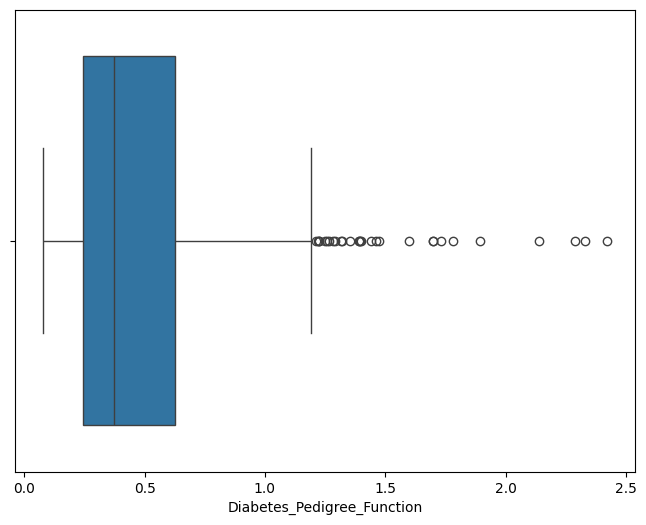

Boxplot after outlier treatment: Diabetes_Pedigree_Function


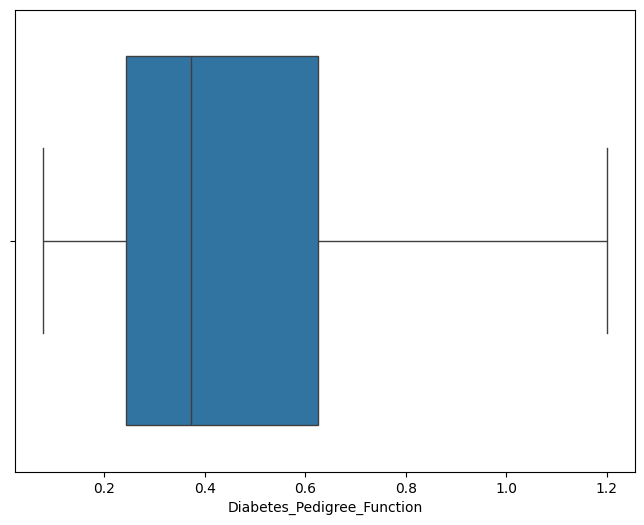

Boxplot before outlier treatment: Age


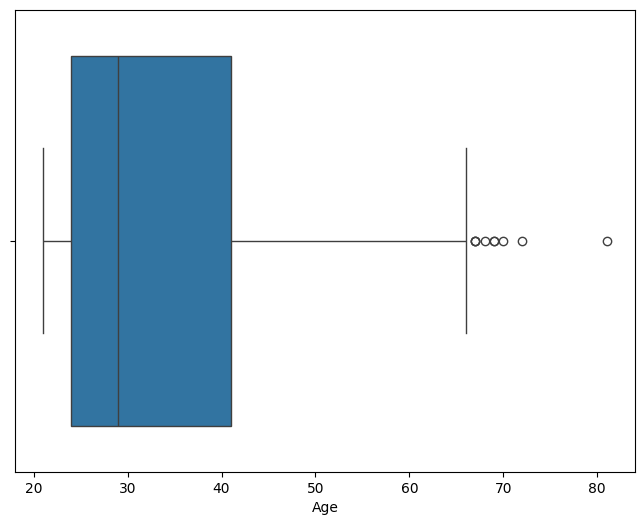

Boxplot after outlier treatment: Age


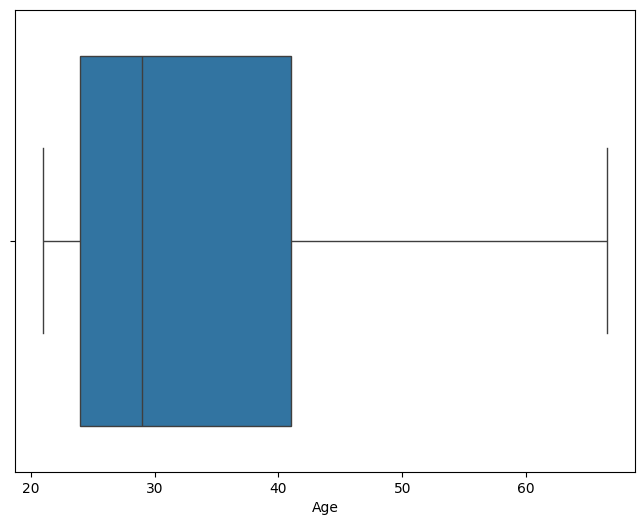

In [ ]:
outlier_treatment(df)

In [ ]:
df

Pregnancie  Glucose  Blood_Pressure  Skin_Thickness  Insulin   BMI  \
0           6.0    148.0            72.0            35.0      0.0  33.6   
1           1.0     85.0            66.0            29.0      0.0  26.6   
2           8.0    183.0            64.0             0.0      0.0  23.3   
3           1.0     89.0            66.0            23.0     94.0  28.1   
4           0.0    137.0            40.0            35.0    168.0  43.1   
..          ...      ...             ...             ...      ...   ...   
763        10.0    101.0            76.0            48.0    180.0  32.9   
764         2.0    122.0            70.0            27.0      0.0  36.8   
765         5.0    121.0            72.0            23.0    112.0  26.2   
766         1.0    126.0            60.0             0.0      0.0  30.1   
767         1.0     93.0            70.0            31.0      0.0  30.4   

     Diabetes_Pedigree_Function   Age  Outcome  
0                         0.627  50.0        1  
1                         0.351  31.0        0  
2                         0.672  32.0        1  
3                         0.167  21.0        0  
4                         1.200  33.0        1  
..                          ...   ...      ...  
763                       0.171  63.0        0  
764                       0.340  27.0        0  
765                       0.245  30.0        0  
766                       0.349  47.0        1  
767                       0.315  23.0        0  

[768 rows x 9 columns]

In [ ]:
df

Pregnancie  Glucose  Blood_Pressure  Skin_Thickness  Insulin   BMI  \
0           6.0    148.0            72.0            35.0      0.0  33.6   
1           1.0     85.0            66.0            29.0      0.0  26.6   
2           8.0    183.0            64.0             0.0      0.0  23.3   
3           1.0     89.0            66.0            23.0     94.0  28.1   
4           0.0    137.0            40.0            35.0    168.0  43.1   
..          ...      ...             ...             ...      ...   ...   
763        10.0    101.0            76.0            48.0    180.0  32.9   
764         2.0    122.0            70.0            27.0      0.0  36.8   
765         5.0    121.0            72.0            23.0    112.0  26.2   
766         1.0    126.0            60.0             0.0      0.0  30.1   
767         1.0     93.0            70.0            31.0      0.0  30.4   

     Diabetes_Pedigree_Function   Age  Outcome  
0                         0.627  50.0        1  
1                         0.351  31.0        0  
2                         0.672  32.0        1  
3                         0.167  21.0        0  
4                         1.200  33.0        1  
..                          ...   ...      ...  
763                       0.171  63.0        0  
764                       0.340  27.0        0  
765                       0.245  30.0        0  
766                       0.349  47.0        1  
767                       0.315  23.0        0  

[768 rows x 9 columns]

In [ ]:
df['Skin_Thickness'] == 0

0      False
1      False
2       True
3      False
4      False
       ...  
763    False
764    False
765    False
766     True
767    False
Name: Skin_Thickness, Length: 768, dtype: bool

In [ ]:
df[df['Skin_Thickness'] == 0]

Pregnancie  Glucose  Blood_Pressure  Skin_Thickness  Insulin    BMI  \
2           8.0    183.0            64.0             0.0      0.0  23.30   
5           5.0    116.0            74.0             0.0      0.0  25.60   
7          10.0    115.0            35.0             0.0      0.0  35.30   
9           8.0    125.0            96.0             0.0      0.0  13.35   
10          4.0    110.0            92.0             0.0      0.0  37.60   
..          ...      ...             ...             ...      ...    ...   
757         0.0    123.0            72.0             0.0      0.0  36.30   
758         1.0    106.0            76.0             0.0      0.0  37.50   
759         6.0    190.0            92.0             0.0      0.0  35.50   
762         9.0     89.0            62.0             0.0      0.0  22.50   
766         1.0    126.0            60.0             0.0      0.0  30.10   

     Diabetes_Pedigree_Function   Age  Outcome  
2                         0.672  32.0        1  
5                         0.201  30.0        0  
7                         0.134  29.0        0  
9                         0.232  54.0        1  
10                        0.191  30.0        0  
..                          ...   ...      ...  
757                       0.258  52.0        1  
758                       0.197  26.0        0  
759                       0.278  66.0        1  
762                       0.142  33.0        0  
766                       0.349  47.0        1  

[227 rows x 9 columns]

In [ ]:
df['Skin_Thickness'].mode()

0    0.0
Name: Skin_Thickness, dtype: float64

In [ ]:
df['Skin_Thickness'].min()

0.0

As we can see skin thikness column has few values as 0 which cannot be possible. Therefore we should replace them with median as it is the best practice

In [ ]:
skin_median = df['Skin_Thickness'].median()
df['Skin_Thickness'] = df['Skin_Thickness'].replace(0,skin_median)

In [ ]:
df['Skin_Thickness']

0      35.0
1      29.0
2      23.0
3      23.0
4      35.0
       ... 
763    48.0
764    27.0
765    23.0
766    23.0
767    31.0
Name: Skin_Thickness, Length: 768, dtype: float64

Boxplot before outlier treatment: Pregnancie


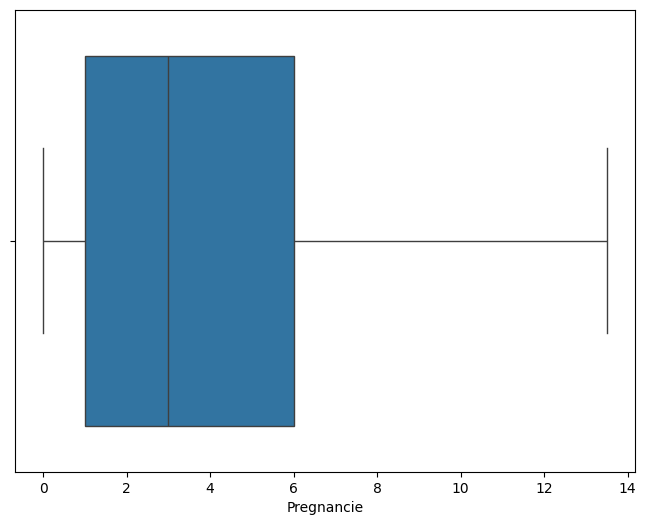

Boxplot after outlier treatment: Pregnancie


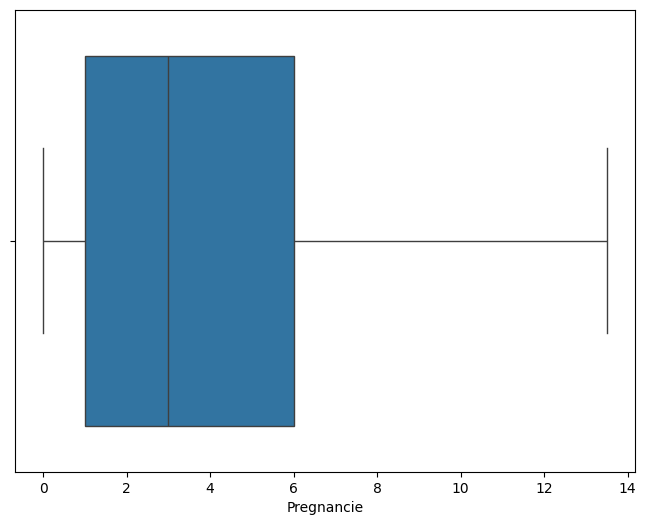

Boxplot before outlier treatment: Glucose


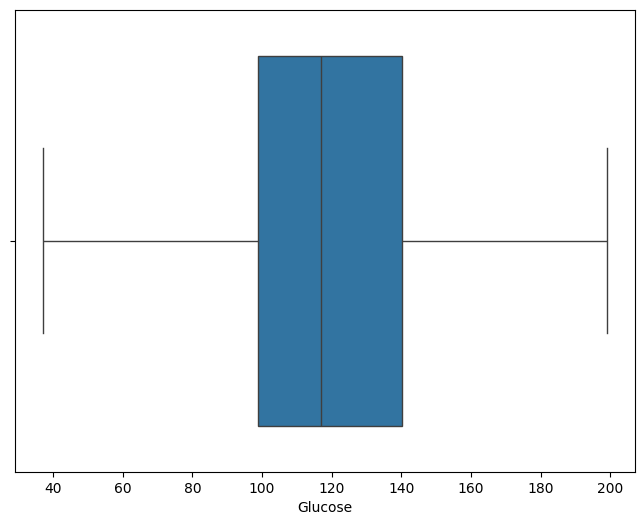

Boxplot after outlier treatment: Glucose


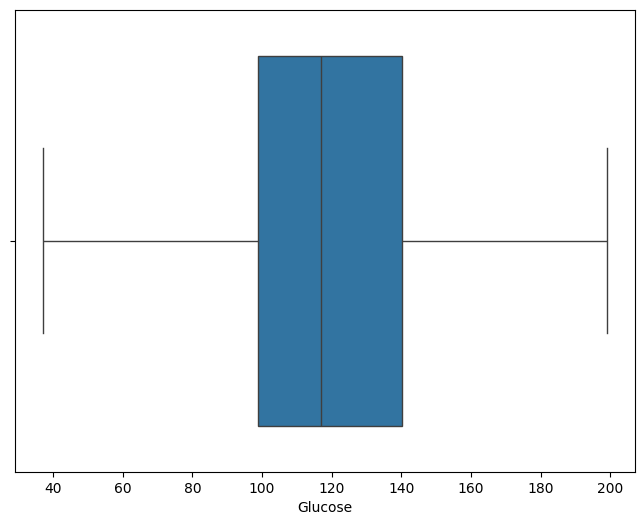

Boxplot before outlier treatment: Blood_Pressure


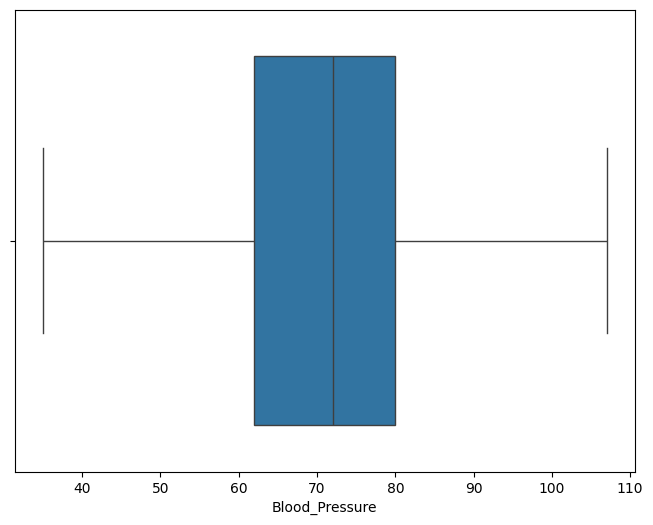

Boxplot after outlier treatment: Blood_Pressure


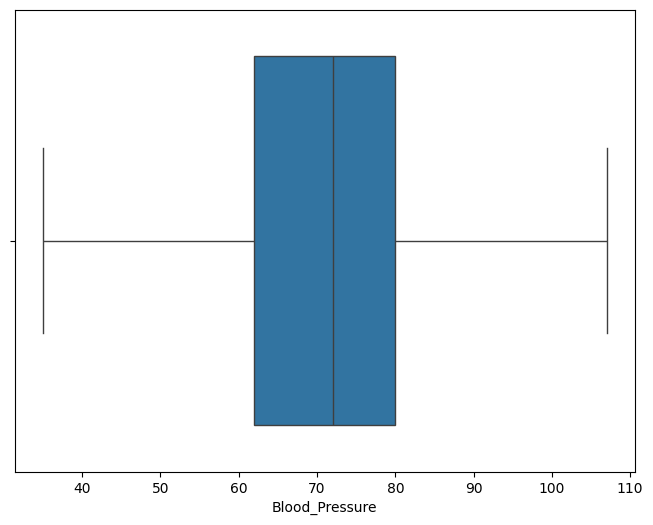

Boxplot before outlier treatment: Skin_Thickness


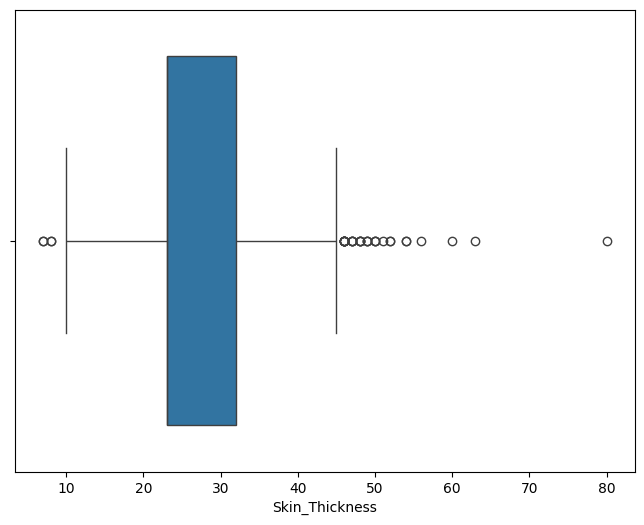

Boxplot after outlier treatment: Skin_Thickness


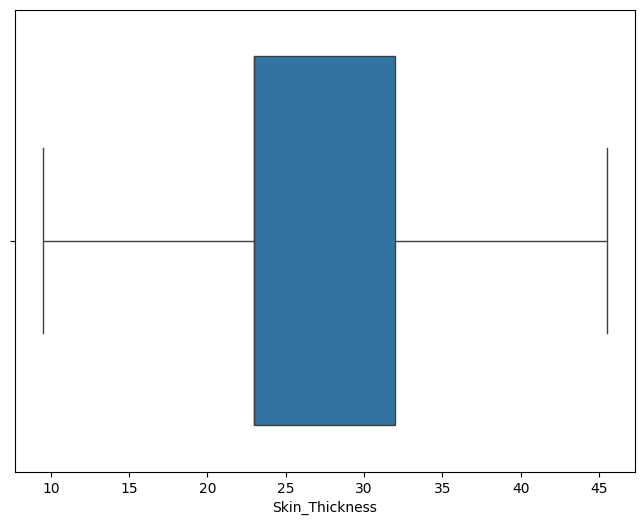

Boxplot before outlier treatment: Insulin


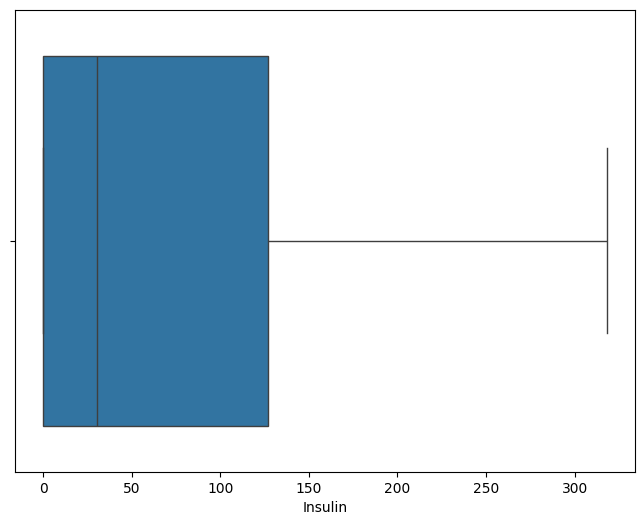

Boxplot after outlier treatment: Insulin


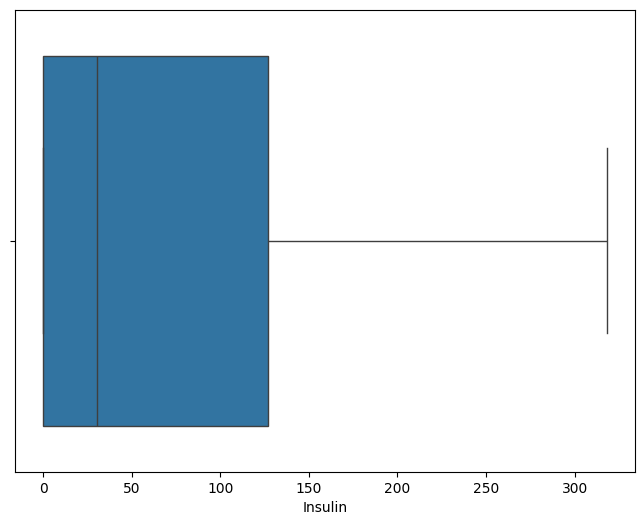

Boxplot before outlier treatment: BMI


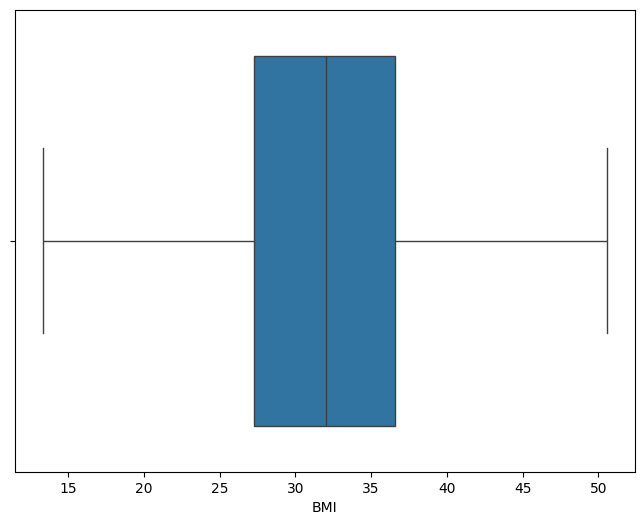

Boxplot after outlier treatment: BMI


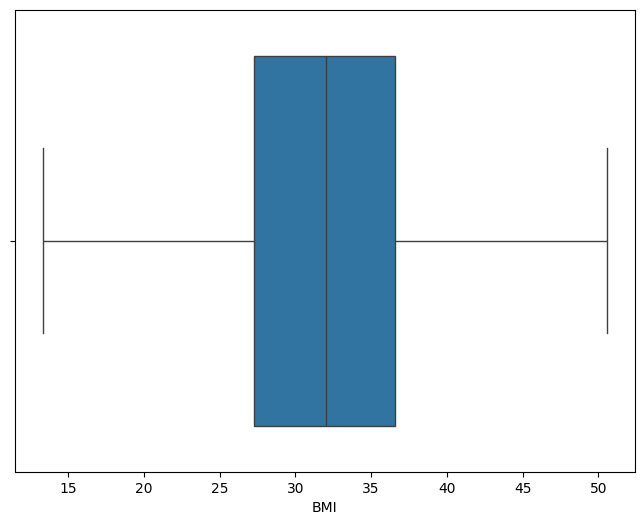

Boxplot before outlier treatment: Diabetes_Pedigree_Function


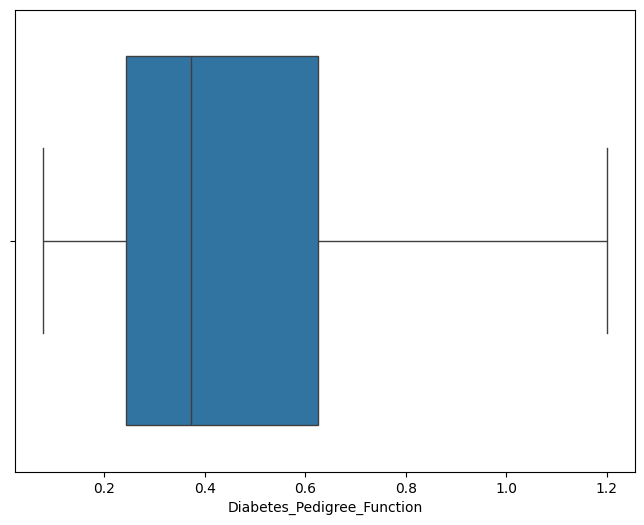

Boxplot after outlier treatment: Diabetes_Pedigree_Function


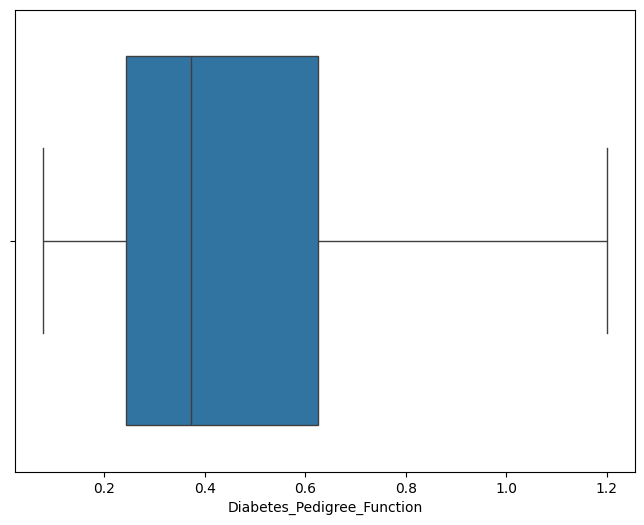

Boxplot before outlier treatment: Age


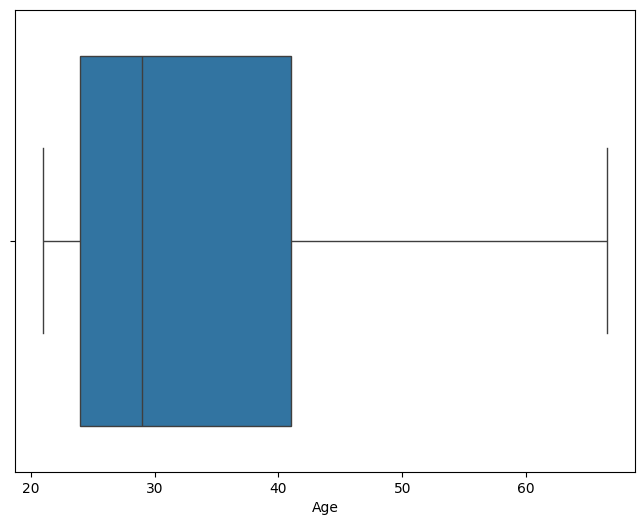

Boxplot after outlier treatment: Age


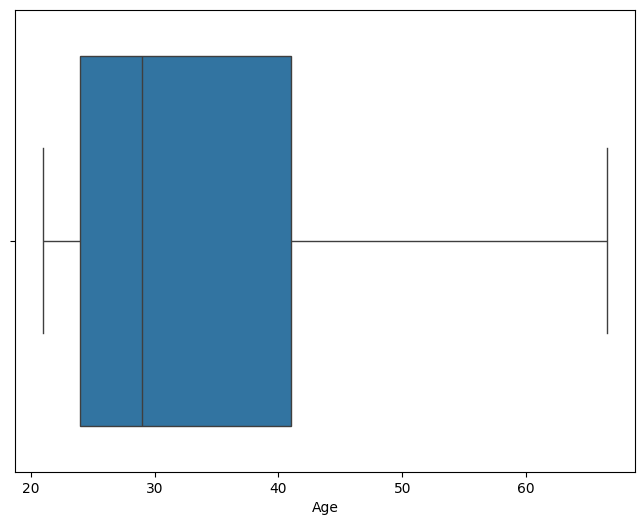

In [ ]:
outlier_treatment(df)

#EDA

##Univariate Analysis

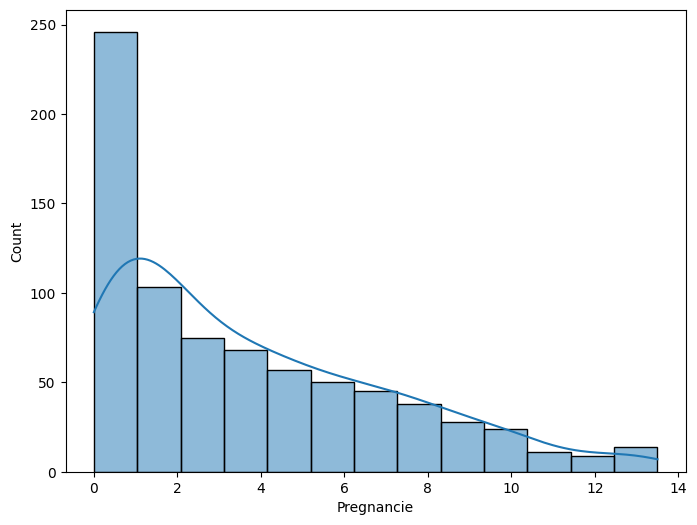

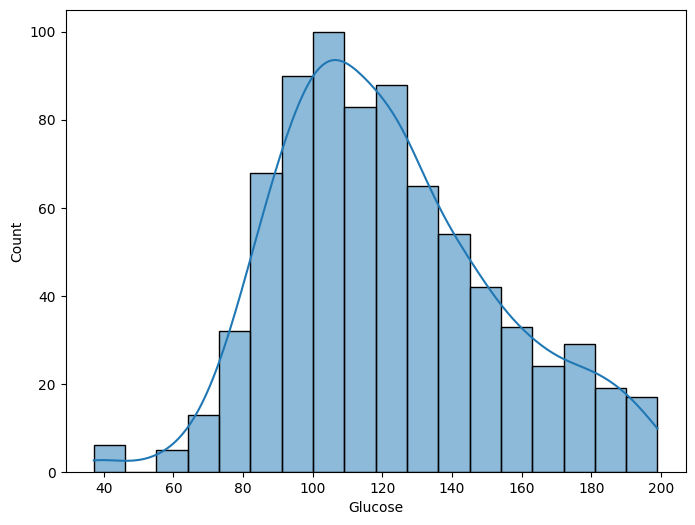

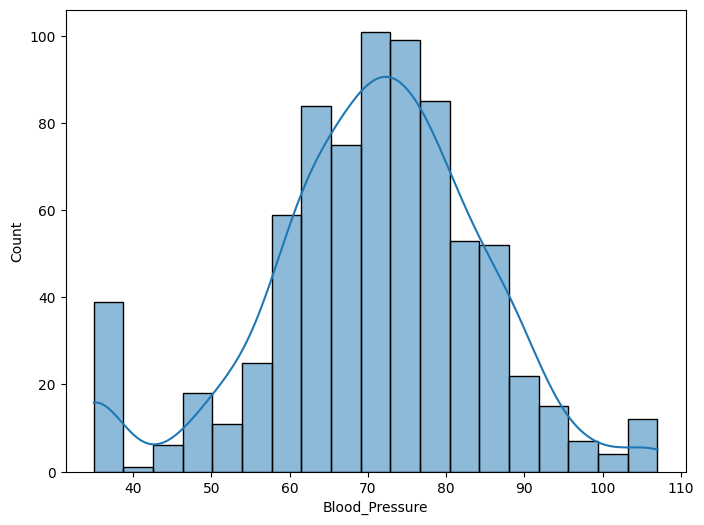

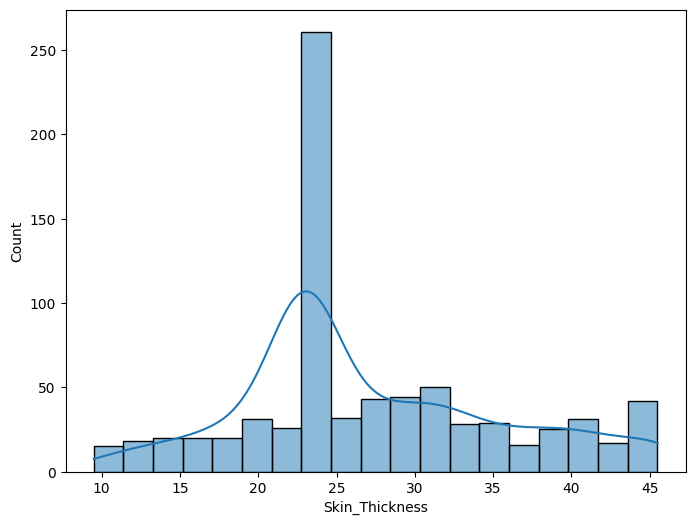

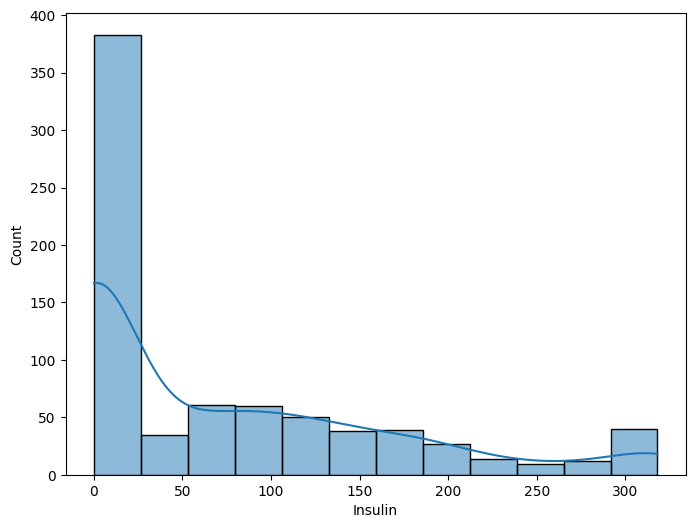

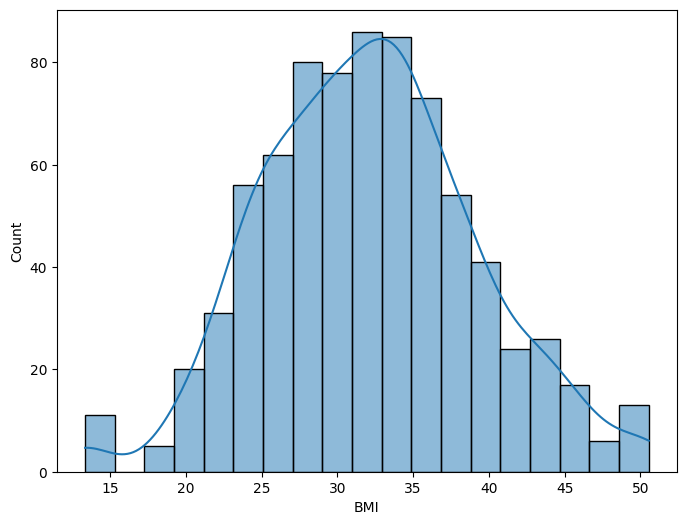

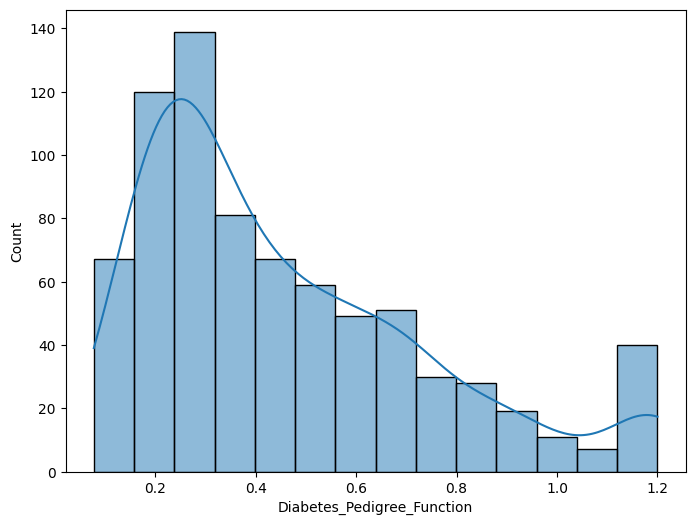

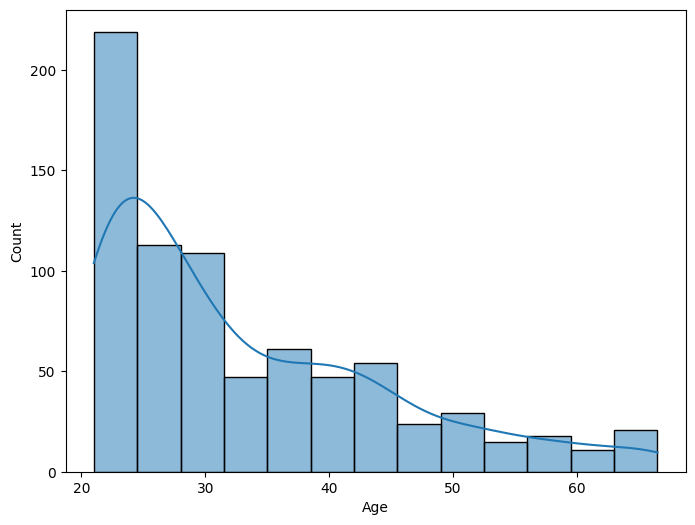

In [ ]:
for col in num_cols:
  plt.figure(figsize=(8,6))
  sns.histplot(x=df[col], kde = True)
  plt.show()

##Bi-Variate Analysis

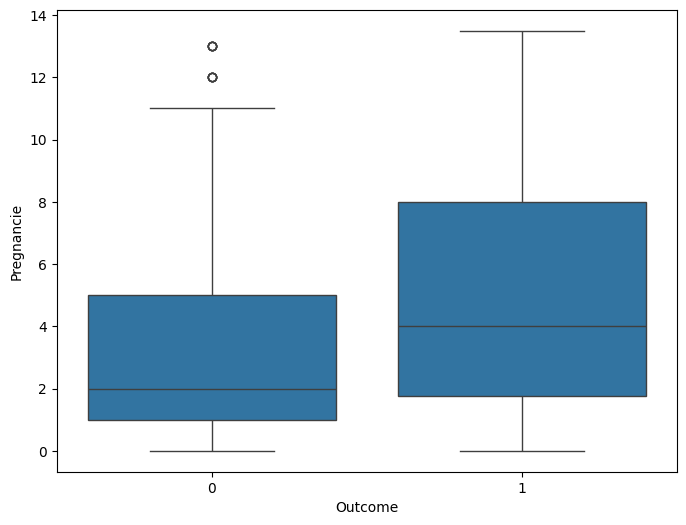

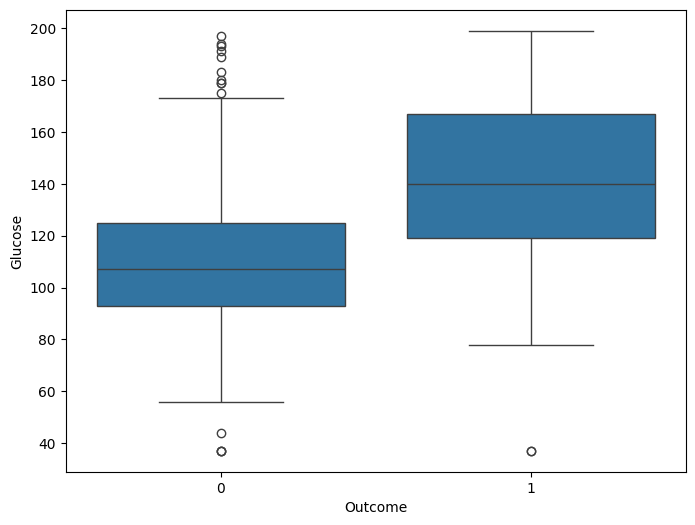

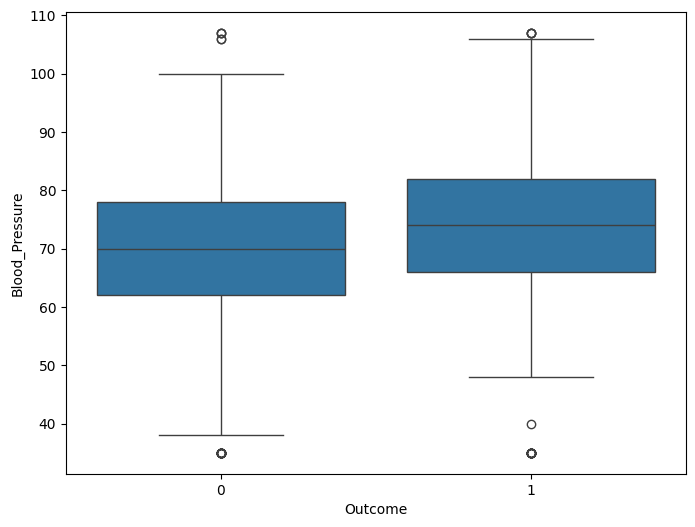

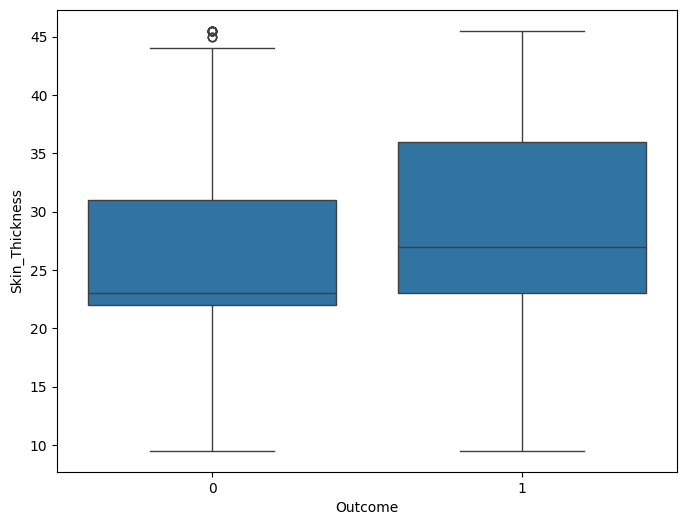

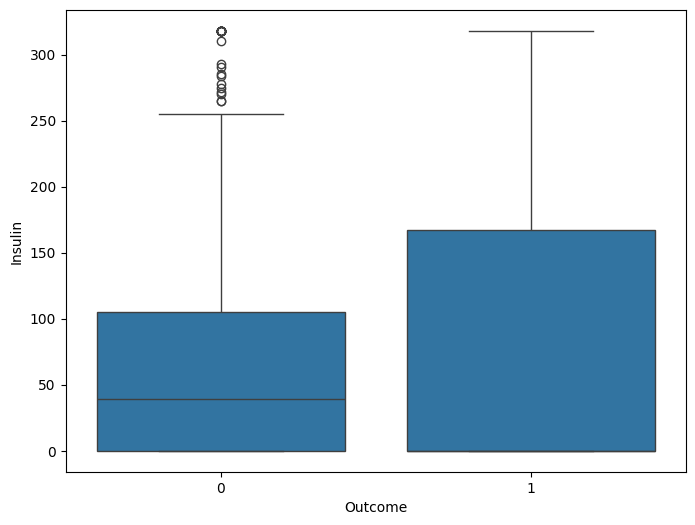

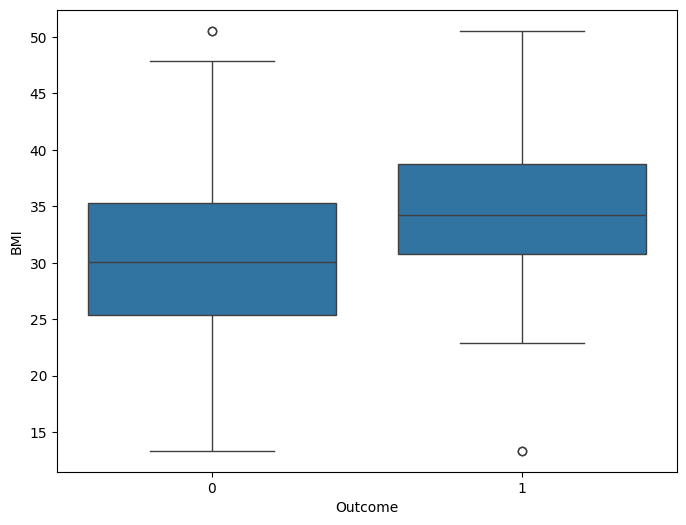

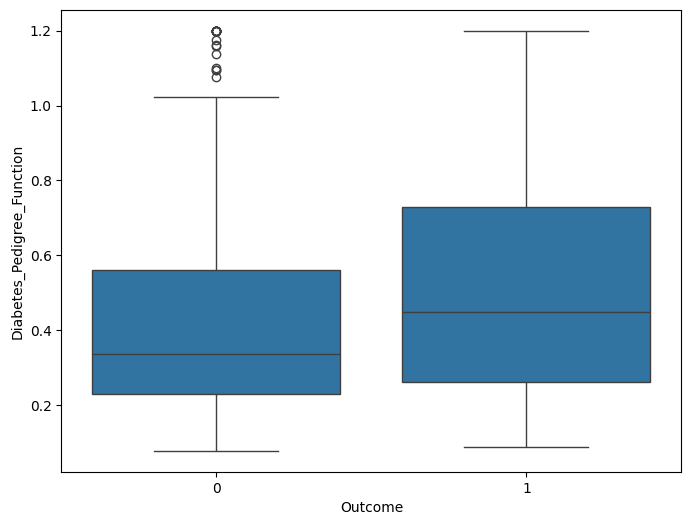

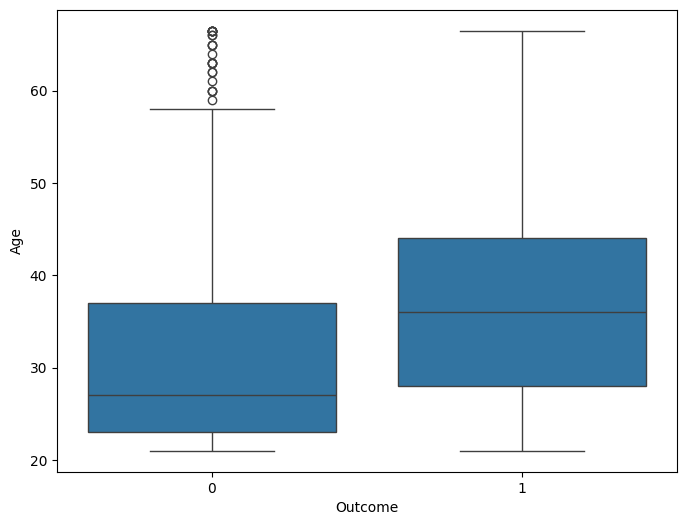

In [ ]:
for col in num_cols:
  plt.figure(figsize=(8,6))
  sns.boxplot( x=df['Outcome'], y=df[col] )
  plt.show()

Scatter plot

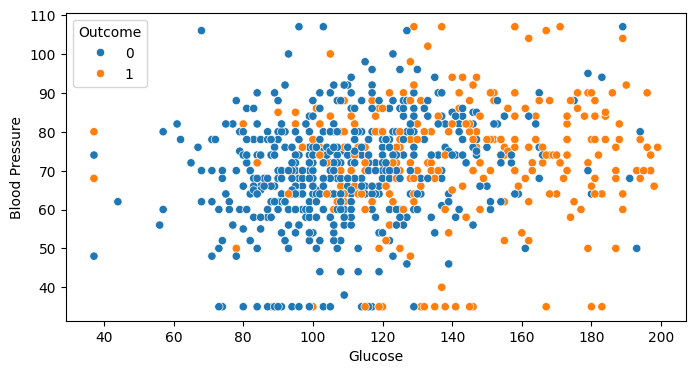

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(data = df, x = 'Glucose', y = 'Blood_Pressure', hue = 'Outcome')
plt.xlabel('Glucose')
plt.ylabel('Blood Pressure')
plt.show()

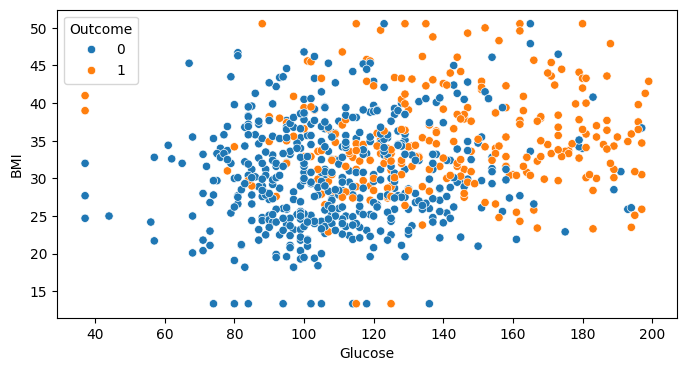

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(data = df, x = 'Glucose', y = 'BMI', hue = 'Outcome')
plt.show()

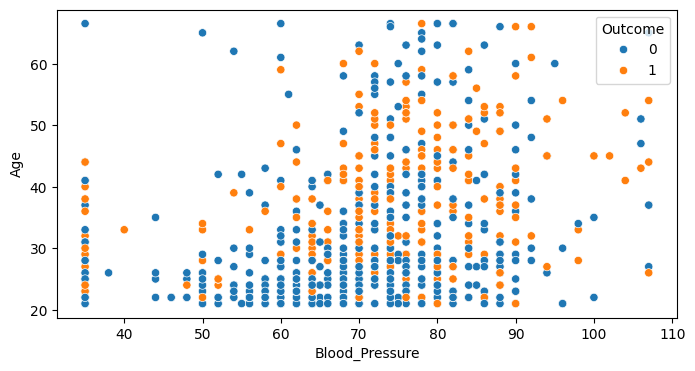

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(data = df, x = 'Blood_Pressure', y = 'Age', hue = 'Outcome')
plt.show()

Pairplot

<Figure size 1200x1000 with 0 Axes>

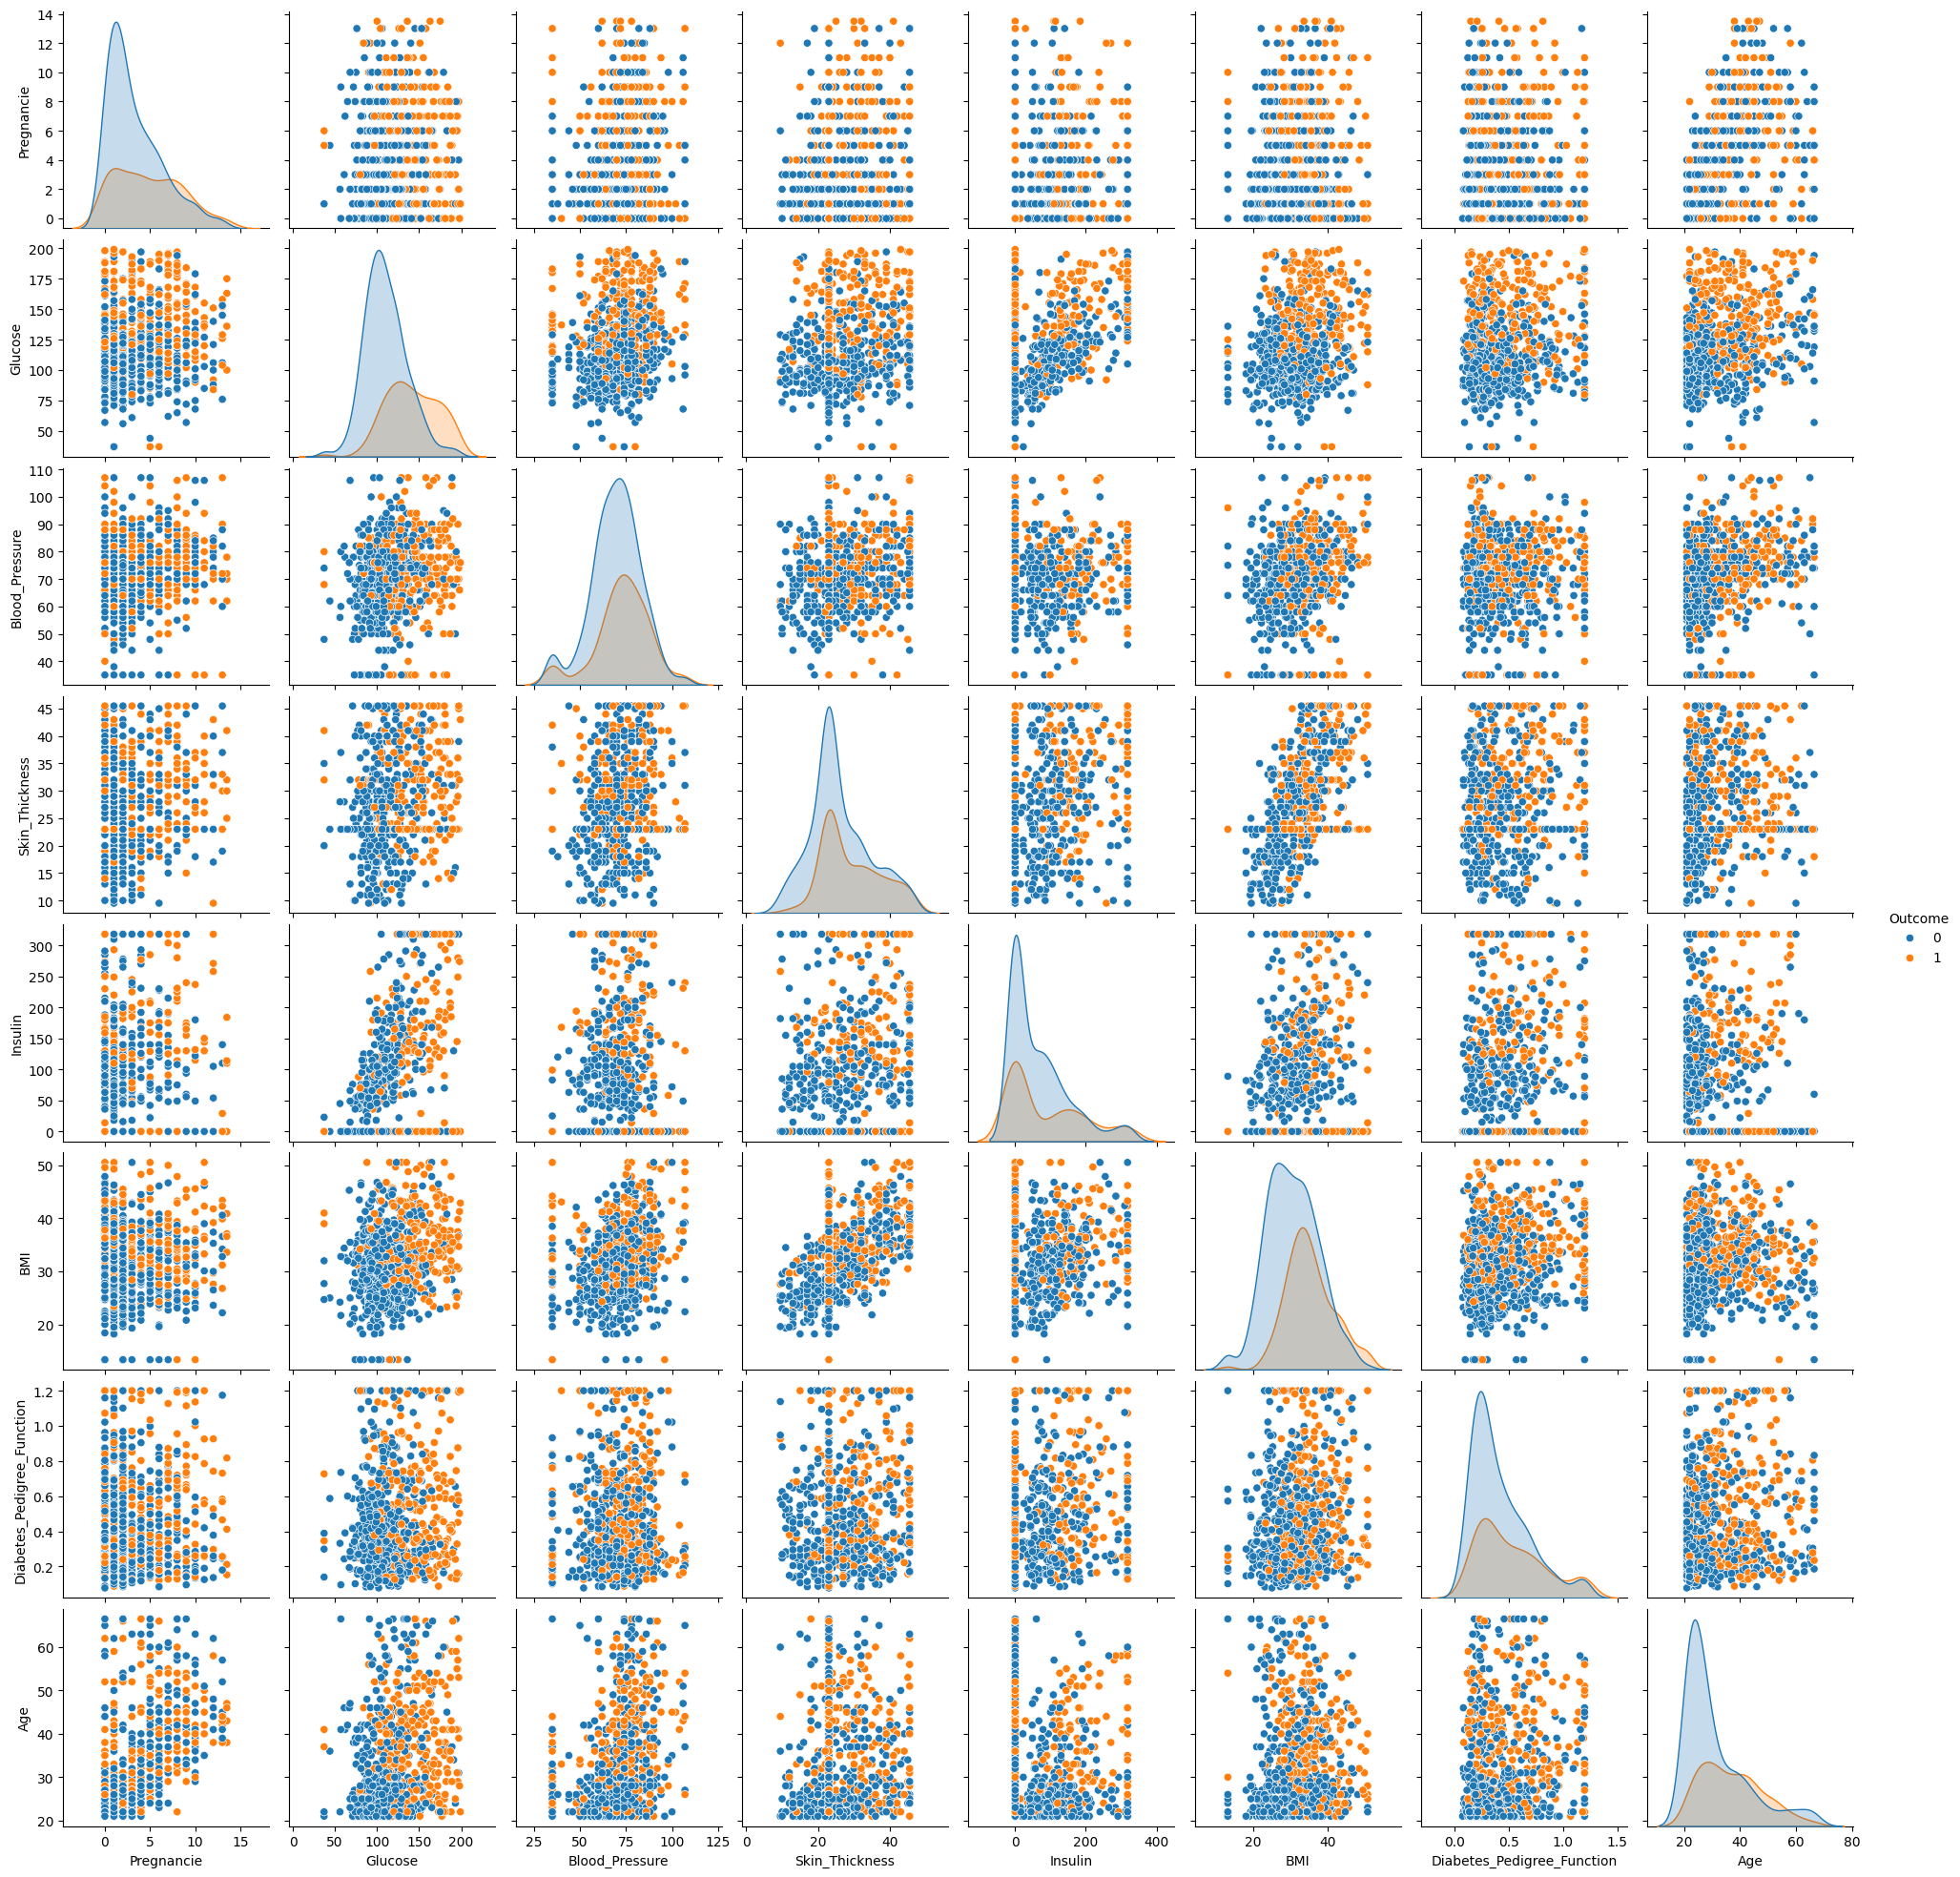

In [ ]:
plt.figure(figsize=(12,10))
sns.pairplot(df, hue='Outcome')
plt.show()

##Heatmap of all the numerical columns

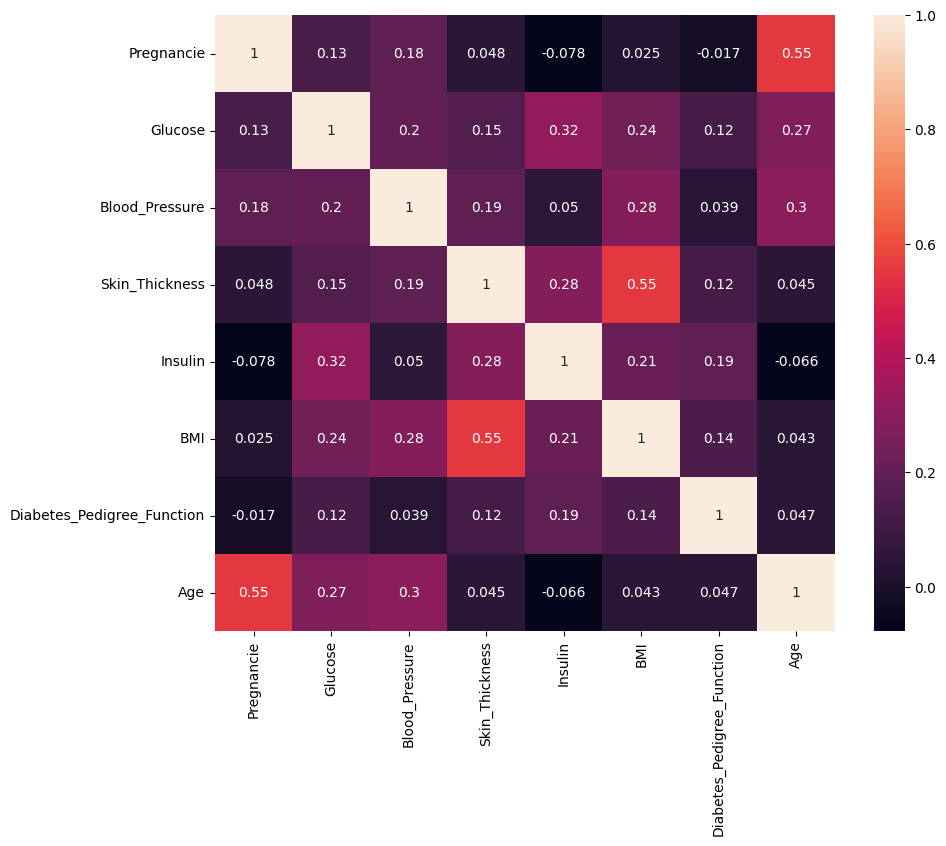

In [ ]:
corr = df[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)
plt.show()

#Model Building

## Train Test split

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train.head(5)

Pregnancie  Glucose  Blood_Pressure  Skin_Thickness  Insulin    BMI  \
357        13.0    129.0            35.0            30.0      0.0  39.90   
73          4.0    129.0            86.0            20.0    270.0  35.10   
352         3.0     61.0            82.0            28.0      0.0  34.40   
497         2.0     81.0            72.0            15.0     76.0  30.10   
145         0.0    102.0            75.0            23.0      0.0  13.35   

     Diabetes_Pedigree_Function   Age  
357                       0.569  44.0  
73                        0.231  23.0  
352                       0.243  46.0  
497                       0.547  25.0  
145                       0.572  21.0

In [ ]:
X_test.head(5)

Pregnancie  Glucose  Blood_Pressure  Skin_Thickness  Insulin   BMI  \
668         6.0     98.0            58.0            33.0    190.0  34.0   
324         2.0    112.0            75.0            32.0      0.0  35.7   
624         2.0    108.0            64.0            23.0      0.0  30.8   
690         8.0    107.0            80.0            23.0      0.0  24.6   
473         7.0    136.0            90.0            23.0      0.0  29.9   

     Diabetes_Pedigree_Function   Age  
668                       0.430  43.0  
324                       0.148  21.0  
624                       0.158  21.0  
690                       0.856  34.0  
473                       0.210  50.0

In [ ]:
y_train.head(5)

357    1
73     0
352    0
497    0
145    0
Name: Outcome, dtype: int64

In [ ]:
y_test.head(5)

668    0
324    0
624    0
690    0
473    0
Name: Outcome, dtype: int64

##Model Training

###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score, precision_score, recall_score, roc_curve

In [ ]:
log_model = LogisticRegression()
#train the model
log_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Making pred
y_pred = log_model.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1
 0 0 0 1 0 0 0]


In [ ]:
#model_evaluation
acc_log_socre = accuracy_score(y_test, y_pred)
precision_log_score = precision_score(y_test, y_pred)
recall_log_score = recall_score(y_test, y_pred)
conf_log_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy Score for Logistic Regression: {acc_log_socre:.4f}')
print(f'Precision Score for Logistic Regression: {precision_log_score:.4f}')
print(f'Recall Score for Logistic Regression: {recall_log_score:.4f}')
print(f'Confusion Matrix for Logistic Regression:\n {conf_log_matrix}')

Accuracy Score for Logistic Regression: 0.7396
Precision Score for Logistic Regression: 0.6418
Recall Score for Logistic Regression: 0.6232
Confusion Matrix for Logistic Regression:
 [[99 24]
 [26 43]]


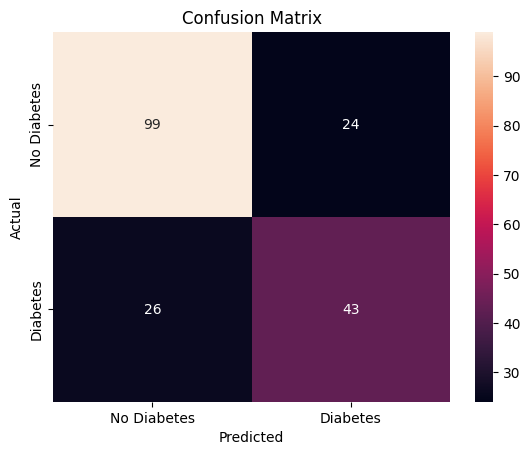

In [ ]:
#plotting confusion matrix
sns.heatmap(conf_log_matrix, annot=True, fmt='d', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#predicitng probability
y_pred_prob = log_model.predict_proba(X_test)[:,1]
print(y_pred_prob)

[0.26899546 0.17137953 0.10511427 0.17321471 0.454124   0.41867973
 0.01242712 0.63242124 0.5517719  0.78585734 0.22267891 0.90145516
 0.31688754 0.30301505 0.08440705 0.46714367 0.12282091 0.06387541
 0.83851662 0.56816008 0.18962943 0.06768916 0.52402655 0.08337474
 0.50689396 0.89970203 0.11195153 0.02204625 0.21793956 0.09754795
 0.91597082 0.88601211 0.78761681 0.83329433 0.64183953 0.72362459
 0.97720314 0.26524969 0.45862847 0.6612467  0.05824132 0.66313136
 0.58447059 0.30688861 0.02178314 0.56460168 0.69766597 0.21066705
 0.39624665 0.97098114 0.03872569 0.69118771 0.82547344 0.26518723
 0.08181779 0.03400276 0.79588735 0.01278049 0.44896573 0.77257025
 0.7599882  0.34300175 0.16400279 0.177296   0.0628032  0.66360031
 0.04235601 0.7073967  0.03838566 0.84988132 0.73409194 0.05309104
 0.16215155 0.09366975 0.08310542 0.49876696 0.17294841 0.16296067
 0.13359015 0.20352613 0.68104571 0.1570017  0.05196558 0.38780365
 0.25939673 0.84759483 0.91251766 0.33003019 0.10527015 0.0653

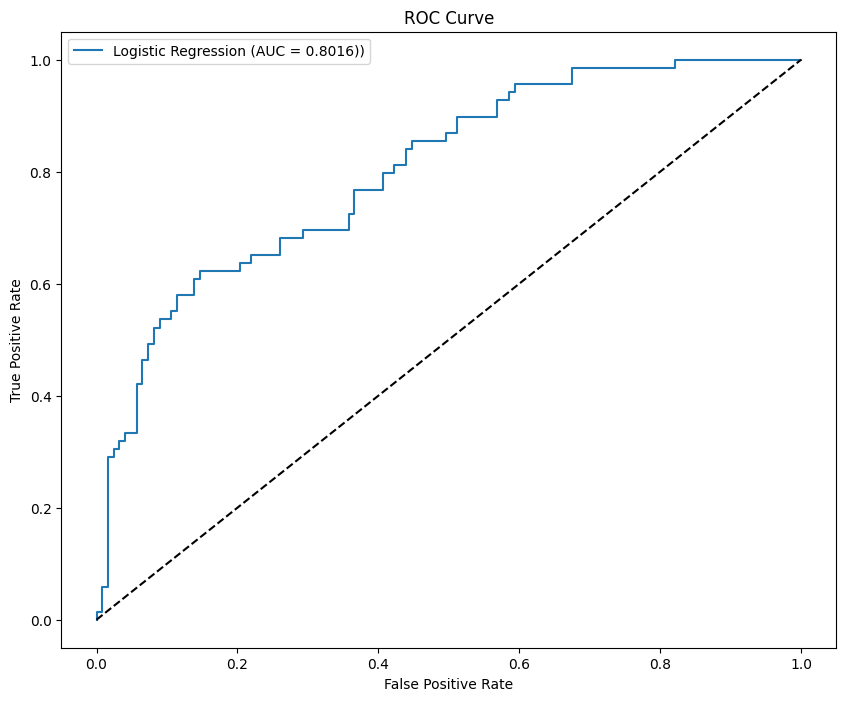

In [ ]:
#ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

#plotting roc curve
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.4f}))' )
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

###Decision Tree

In [ ]:
dec_model = DecisionTreeClassifier()
dec_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dec = dec_model.predict(X_test)
print(y_pred_dec)

[0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1
 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0
 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1
 0 0 0 1 1 0 0]


In [ ]:
#Evaluation matrix
acc_dec_score = accuracy_score(y_test, y_pred_dec)
precision_dec_score = precision_score(y_test, y_pred_dec)
recall_dec_score = recall_score(y_test, y_pred_dec)
conf_dec_matrix = confusion_matrix(y_test, y_pred_dec)

print(f'Accuracy Score for Decision Tree: {acc_dec_score:.4f}')
print(f'Precision Score for Decision Tree: {precision_dec_score:.4f}')
print(f'Recall Score for Decision Tree: {recall_dec_score:.4f}')
print(f'Confusion Matrix for Decision Tree:\n {conf_dec_matrix}')


Accuracy Score for Decision Tree: 0.6771
Precision Score for Decision Tree: 0.5443
Recall Score for Decision Tree: 0.6232
Confusion Matrix for Decision Tree:
 [[87 36]
 [26 43]]


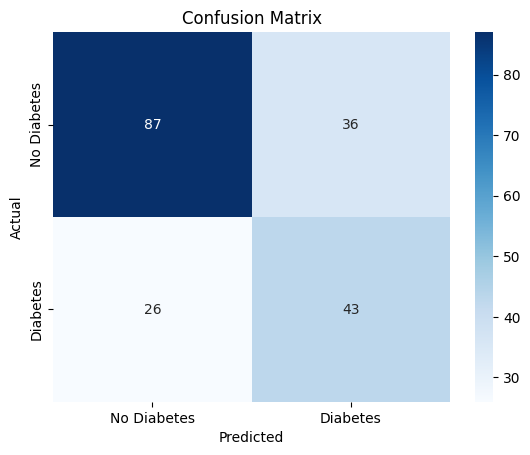

In [ ]:
#plotting confusion matrix
sns.heatmap(conf_dec_matrix, annot=True, fmt='d', cmap = 'Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#probability
y_pred_prob_dec = dec_model.predict_proba(X_test)[:,1]

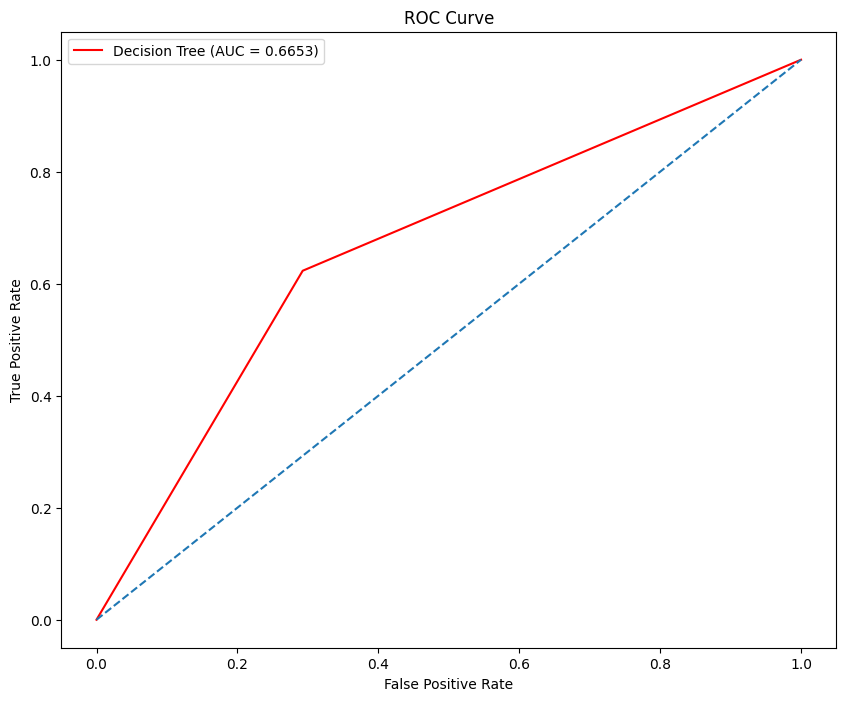

In [ ]:
#roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_dec)
roc_auc_dec = auc(fpr, tpr)

#plot roc curve
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color = 'Red', label=f'Decision Tree (AUC = {roc_auc_dec:.4f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


##Comparison Table

In [ ]:
compare_df = pd.DataFrame({
    'Metrix' : ['Accuracy', 'Precision', 'Recall'],
    'Logistic Regression' : [acc_log_socre, precision_log_score, recall_log_score],
    'Decision Tree' : [acc_dec_score, precision_dec_score, recall_dec_score]
})

print(f'Model Comparison: \n')
print(compare_df)

Model Comparison: 

      Metrix  Logistic Regression  Decision Tree
0   Accuracy             0.739583       0.677083
1  Precision             0.641791       0.544304
2     Recall             0.623188       0.623188


##**CONLUSION :-**

As we can see from the above Table that Logistic Regression Performs better than Decision Tree

### Why Choose Logistic Regression?

1. **Better Overall Performance**: Logistic Regression performs better in terms of accuracy, precision, and recall.
2. **Fewer False Positives**: Important for medical predictions, where false positives can lead to unnecessary treatments.
3. **Better Detection of Diabetes**: Logistic Regression is more likely to detect individuals who have diabetes.
4. **Simplicity**: Logistic Regression is less prone to overfitting compared to Decision Trees.

Thus, **Logistic Regression** is the better model for predicting diabetes.
